<a href="https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/4_2_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 Markov Chains
So how can we do better? Remember, music is a temporal art, and often the order in which things happens is meaningful. The answer: ***conditional probability.*** Conditional probability quantifies the likelihood that an outcome will occur *given that another outcome has already ocurred*. Conditional probability expresses the concept of contingency and is used to describe random processes that depend on something. With music,  we often use conditional probability to express the realtionships between the future and past.

A ***Markov chain*** is a probability system in which the likelihood of *future* outcomes is determined by *past* outcomes. It's a tool for working with conditional probability, and, in this notebook, we'll use Markov chains to model sequence of musical events. Markov chains have two improtant features: the ***order*** which determines how far back past events affect future likelihoods, and the ***transition matrix*** which is a data structure that represents the system of conditional probabilitles.

Note: Markov chains are implements in the `mai` package, so this notebook is mostly about how to use it.

## Setup

In [0]:
# install external libraries for sound playback
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

In [0]:
# imports
import mai
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Learn a transition table from data
We are going to learn a markov chain transition matrix from an example sequence. Our first example is a short sequence of numbers:

In [0]:
# make some dummy music
music = [60, 62, 64, 65, 67]

First, we have to create a new markov chain to keep track of our data — this is the variable `mark`. Then we learn the transition table by calling the function `train` and passing our example musical sequence `music` as an argument.

In [0]:
# create a new markov chain 
mark = mai.markov.Markov()

# learn a new table from data
mark.train(music, order=1)

View the transition table --- is this what you expected? The transition table counts the number of times we transition from each state to the next. For each entry of the table, the transition is to the left of the colon and the count is to the right. For instance, `((60,), 62): 1,` means the sequence transitions from the state `60` to the state `62` once. 

In [0]:
# view the transition table
mark.transitions

{((60,), 62): 1, ((62,), 64): 1, ((64,), 65): 1, ((65,), 67): 1}

## Generate a new musical sequence from the trained Markov model
This is the fun part. Once we have learned a Markov transition matrix, we can generate new sequences from it! The first thing we must do is set an initial state, otherwise the Markov chain wouldn't know where to start, then call the function `choose` to choose the next state according to the transition table.

In [0]:
# set initial state
mark.state = (60,)

# next choice
mark.choose()

62

You can continue to call choose as many times as you wish... until you get an error!!! NOTE: in the following cell we omit the line of code that sets the initial state because we do not want to resent our initial state each time.



In [0]:
# next choice
mark.choose()

64

If you call `choose` too many times on this particular transition table you eventually get the error: `LookupError: Current state not found in transition table`. The problem is we eventually transition *to* the state `67` but there is no entry in the transition table that tells us where to go *from* state `67`. This is because state `67` is the last number in the sequence that we learned from.

## Now let's try a few other sequences

### Example Sequence #2
What's different about this sequence? Here we add one additional value to our training sequence in order to avoid the error above. We create a loop where the sequence begins and ends on the same value, `60`.

In [0]:
# sequence to train on
music = [60, 62, 64, 65, 67, 60]

# create a new markov chain 
mark = mai.markov.Markov()

# learn a new table from data
mark.train(music, order=1)

# view the transition table
mark.transitions

{((60,), 62): 1,
 ((62,), 64): 1,
 ((64,), 65): 1,
 ((65,), 67): 1,
 ((67,), 60): 1}

Set the initial state

In [0]:
# set initial state
mark.state = (60,)

Now choose repeatedly. You should **not** get an error this time. What happens instead?

In [0]:
# next choice
mark.choose()

62

Generate a sequence of 12 choices and plot it. The original sequence is in blue and the new sequence is in green. How do they compare? The new sequence is an exact copy of the original just repeated.

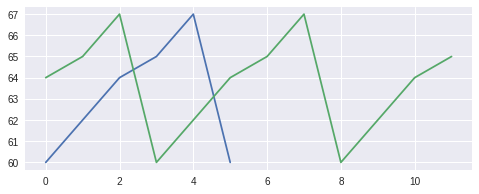

In [0]:
# plot original and new
plt.figure(figsize=(8,3))
plt.plot(music)
plt.plot([mark.choose() for x in range(12)])
plt.show()

### Example Sequence #3
Example sequence #2 loops the same sequence over and over and over again. It is deterministic because there is only one option for each previous state to transition to. How would you change the training sequence such that there are multiple optoins for at least one state?

In [0]:
# training sequence that is not deterministic
music = [60, 62, 64, 65, 67, 60, 67]

# create a new markov chain 
mark = mai.markov.Markov()

# learn a new table from data
mark.train(music, order=1)

# view the transition table
mark.transitions

{((60,), 62): 1,
 ((60,), 67): 1,
 ((62,), 64): 1,
 ((64,), 65): 1,
 ((65,), 67): 1,
 ((67,), 60): 1}

In [0]:
# set initial state
mark.state = (60,)

In [0]:
# next choice
mark.choose()

67

Generate a new sequence of 12 choices and plot it. The original sequence is in blue and the new sequence is in green. How do they compare? The new sequence is not (necessarily) an exact copy of the original, but more like cut up and rearranged segments of the original.

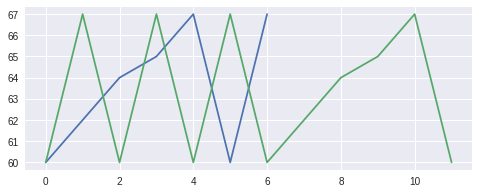

In [0]:
# plot original and new
plt.figure(figsize=(8,3))
plt.plot(music)
plt.plot([mark.choose() for x in range(12)])
plt.show()

Hopefully these simple sequence are helping your intuition develop, but let's move onto music now...